# Some famous graphs

In [1]:
import igraph as igraph
from igraph import * 
#import igraph as ig
import random
################################## First, we define The greedy algorithm ####################################


def the_greedy(g, burnt_candidates, totalBurnt): 
    v_maxDegree = set() 
    maxDegree = 0                     
  

    for v in burnt_candidates: 
        if (g.vs[v].degree()) > maxDegree:
            maxDegree = g.vs[v].degree()
            v_maxDegree.clear()
            v_maxDegree.add(v)
        elif (g.vs[v].degree()) == maxDegree:
            v_maxDegree.add(v)

    return set([random.choice(list(v_maxDegree))])

  
################################# Second, we define The greedy optimized #######################################


def the_greedy_optimized(g, burnt_candidates, totalBurnt): 

    v_maxDegree = set() 
    maxDegree = 0                     
  
    for v in burnt_candidates:
        neighbor = set(g.neighbors(v))
        desiredDegree = len(neighbor.difference(totalBurnt).difference(burnt_candidates))
        if (desiredDegree > maxDegree):
            maxDegree = desiredDegree
            v_maxDegree.clear()
            v_maxDegree.add(v)
        elif (desiredDegree == maxDegree):
            v_maxDegree.add(v)
            
    if (len(v_maxDegree) == 1): 
        return v_maxDegree

    return set([random.choice(list(v_maxDegree))])

############################# Third, we define fire function to examine both algorithms ##########################

def fire(g, root, greedy):
    totalBurnt = set([root])
    burning_candidates = set()
    root=set([root])
    protected = set()
    i = 0
    
    while(len(root) != 0): 
        
        for j in root:
            neighbors= g.neighbors(j) # find neighbors of root
            neighbors = set(neighbors).difference(totalBurnt).difference(root).difference(protected)
            burning_candidates.update(neighbors)

#       if(i==0):
#           print(f"round={i}, r= {root}") 

        if (len(burning_candidates) ==0 ):
            break

    
        v_protected=greedy(g, burning_candidates, totalBurnt)        
        protected.update(v_protected)

        root = burning_candidates.difference(protected)
        totalBurnt.update(root)

        
#       if(i==0): 
#           print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")  # in round zero introduce root
            
#       else:
#           print(f"round={i}, Burning candidate vertices= {burning_candidates},", f"Protected Vertex = {v_protected}")
           
        burning_candidates.clear()
        
        i += 1
      
    
############################### Forth, we print the damage causes by a vertex #################################
    
    ratio= round((len(totalBurnt)/len(g.vs))*100, 1) 
    
    return totalBurnt, protected, ratio





In [2]:
def maxDamage(g, the_greedy, iteration):
    
    listMDVertices=[]
    listMD=[]
    
    for i in range(iteration):
        
        damages_result = []
        vertecies = range(len(g.vs))
        listMaxDamagedVertecies = []
        maxDamage = 0
        
        for v in vertecies:
            totalBurnt, protected, ratio = fire(g, v, the_greedy) 
            damages_result.append([totalBurnt, protected, ratio])

            if (ratio > maxDamage):
                maxDamage = ratio
                listMaxDamagedVertecies.clear()
                listMaxDamagedVertecies.append(v)

            elif (ratio == maxDamage):
                listMaxDamagedVertecies.append(v)
                
        listMDVertices.append(listMaxDamagedVertecies) 
        listMD.append(maxDamage)
        
    return  listMDVertices,listMD  

## 1. K_Regular graph

### Create a random growing graph called g_k_regular

In [3]:
# n: The number of vertices in the graph
# k: The degree of each vertex if the graph is undirected
#    , or the in-degree and out-degree of each vertex if the graph is directed
# directed: whether the graph should be directed.
# multiple: whether it is allowed to create multiple edges.


g_k_regular = igraph.Graph.K_Regular(n=32, k=7, directed=False, multiple=False)

### Visualization

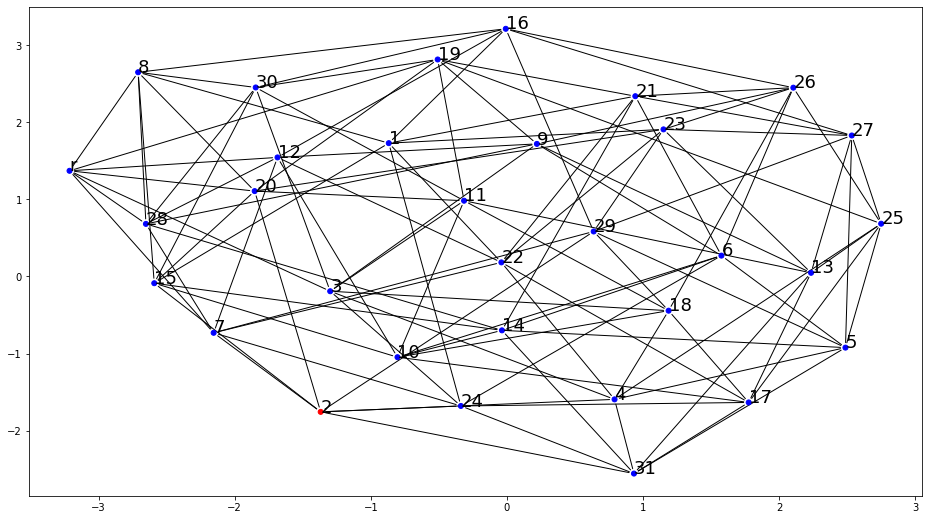

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
vNum=32 # the number of vertices
igraph.plot(g_k_regular, target=ax, vertex_color=["blue"]+["blue"]+["red"]+["blue"]*(vNum-3), 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r']+list(range(1,vNum)))

### 1. Average highest damage with some iterations on graph g_k_regular

In [5]:
result = maxDamage(g_k_regular, the_greedy_optimized, 5) # g_k_regular is a graph with 30 vertices of degree 5
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 26, 27, 28, 29, 30, 31], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]], [90.6, 90.6, 90.6, 90.6, 90.6])

 The average max damage =  90.6


### 2. outcome on one chosen vertex on graph g_k_regular

In [6]:
n= [len(g_k_regular.vs)]
print("The number of vertices: ",n) 

totalBurnt, protected, ratio = fire(g_k_regular,2, the_greedy_optimized) # root is 2 in graph g_k_regular
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

The number of vertices:  [32]
Total burnt vertices: {0, 1, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 27, 28, 30, 31}, Protected vertices: {26, 29, 6}, and Damage: 90.6%


## Creating a table with parameters k and n in a k regular graph (The Greedy opt)

In [7]:
#                      Here we create a table for a K regular graph to show that 

#               with growth of number of vertices how the amount of damage changes


import pandas as pd

k = range(2,8)
n = range(1,61)

table3 = pd.DataFrame(index=k, columns=n)


for i in k:
    
    for j in n:
        damages = []
        try:
            g_k_regular = igraph.Graph.K_Regular(j, i, directed=False, multiple=False)
        except:
            continue
        for x in range(1000):
            _,_,d = fire(g_k_regular, 0, the_greedy_optimized)
            damages.append(d)
        table3.loc[i,j] = sum(damages)/len(damages)

table3

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
2,NaN,NaN,66.7,50,40,33.3,28.6,25,22.2,20,...,3.9,3.8,3.8,3.7,3.6,3.6,3.5,3.4,3.4,3.3
3,NaN,NaN,NaN,75,NaN,66.7,NaN,37.5,NaN,60.07,...,NaN,72.6324,NaN,81.5454,NaN,15.4883,NaN,84.0331,NaN,72.4994
4,NaN,NaN,NaN,NaN,80,66.7,71.4,75,77.8,74.95,...,89.996,89.9839,90.0015,90.3343,89.91,90.425,90.8127,89.6352,90.633,90.6154
5,NaN,NaN,NaN,NaN,NaN,83.3,NaN,75,NaN,80,...,NaN,91.4526,NaN,92.4518,NaN,92.702,NaN,93.0456,NaN,93.1512
6,NaN,NaN,NaN,NaN,NaN,NaN,85.7,75,77.8,80,...,93.1671,92.3,92.5,93.7232,92.7,92.9,93,93.1,93.2,93.3
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.5,NaN,80,...,NaN,92.3,NaN,94.4,NaN,93.9523,NaN,94.8,NaN,93.3


## A table with different roots using The greedy Optimized

In [8]:
k = range(2,8)
n = range(1,61)

table3 = pd.DataFrame(index=k, columns=n)


for i in k:
    

    for j in n:
        damages = []
        for x in range(10):
            dPrime = [] # we create another list to store damges while roots are changing
            try:
                g_k_regular = igraph.Graph.K_Regular(j, i, directed=False, multiple=False)
            except:
                continue
        
            for r in range(j): # we do it by defining a for loop on the number of vertices (pick r from j)
                _,_,d = fire(g_k_regular, r, the_greedy_optimized)
                
                dPrime.append(d)
            if len(dPrime)== 0:
                continue
            else:
                
                damages.append(sum(dPrime)/len(dPrime)) # we add mean of the list we already defined
        if len(damages) == 0:
            continue
        else:
            
            table3.loc[i,j] = sum(damages)/len(damages)

table3

# create for fix i and j with more run

,1,2,3,4,5,6,7,8,9,10,...,51,52,53,54,55,56,57,58,59,60
2,NaN,NaN,66.7,50,40,33.3,28.6,25,22.2,20,...,3.9,3.8,3.8,3.7,3.6,3.6,3.5,3.4,3.4,3.3
3,NaN,NaN,NaN,75,NaN,66.7,NaN,52.5,NaN,52,...,NaN,70.9404,NaN,69.093,NaN,76.1925,NaN,73.1472,NaN,74.5148
4,NaN,NaN,NaN,NaN,80,66.7,71.4,75,75.0867,71.4,...,89.4773,89.7092,89.9368,90.0841,90.2225,90.4796,90.5046,90.5934,90.7364,90.9955
5,NaN,NaN,NaN,NaN,NaN,83.3,NaN,75,NaN,80,...,NaN,92.1283,NaN,92.2411,NaN,92.5464,NaN,92.7072,NaN,92.8707
6,NaN,NaN,NaN,NaN,NaN,NaN,85.7,75,77.8,80,...,92.5465,92.6837,92.8362,92.82,92.9095,93.0973,93.0984,93.1909,93.3181,93.3852
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87.5,NaN,80,...,NaN,93.8785,NaN,93.9867,NaN,94.1902,NaN,94.2929,NaN,94.3483


## Creating a plot to show the amount of damage with the growth of vertices

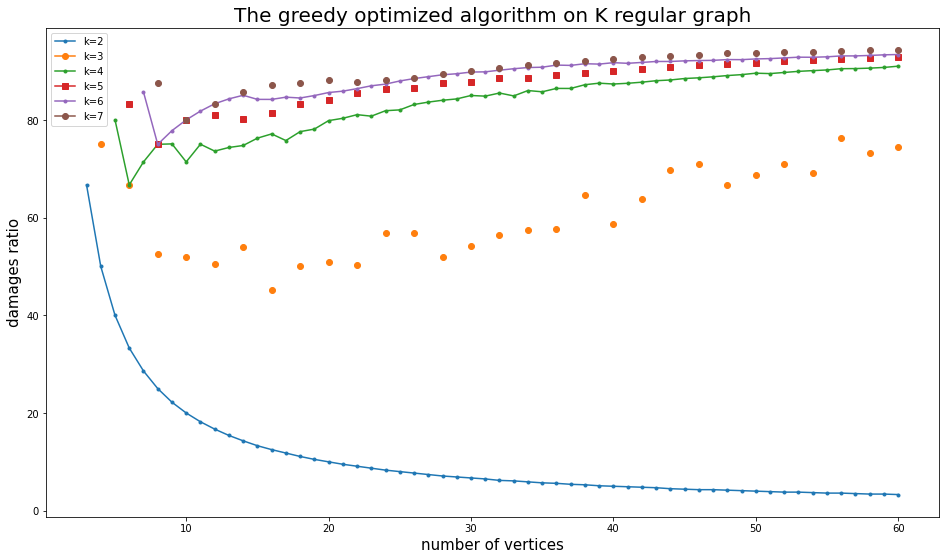

In [9]:
fig3, ax3 = plt.subplots(figsize=(16, 9))

ax3.plot(table3.columns, table3.loc[2], label="k=2", marker=".") # a graph 2-regular
ax3.plot(table3.columns, table3.loc[3], label="k=3", marker="o") # a graph 3-regular
ax3.plot(table3.columns, table3.loc[4], label="k=4", marker=".") # a graph 4-regular
ax3.plot(table3.columns, table3.loc[5], label="k=5", marker="s") # a graph 5-regular
ax3.plot(table3.columns, table3.loc[6], label="k=6", marker=".") # a graph 5-regular
ax3.plot(table3.columns, table3.loc[7], label="k=7", marker="o") # a graph 5-regular


ax3.set_xlabel("number of vertices", fontsize=15)
ax3.set_ylabel("damages ratio", fontsize=15)

ax3.legend() #

# Set titles
ax3.set_title('The greedy optimized algorithm on K regular graph', fontsize=20)
plt.show()

## Report for plot 3
### As the number of vertices goes up, the amount of damages is increasing. It is more noticable for k regaular graphs with more than 10 vertices where k>=4. 

###  1.1) A 2-regular graph

In [10]:
import random 
random.seed(123)# this code makes we get the same random graph whenever we run it

g_k_regular = igraph.Graph.K_Regular(n=12, k=3, directed=False, multiple=False)

### Visualization

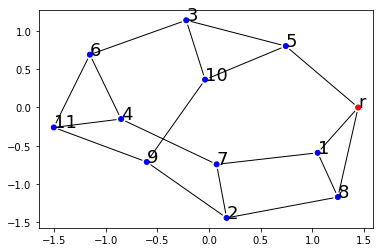

In [11]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
vNum=12 # the number of vertices
igraph.plot(g_k_regular, target=ax, vertex_color=["red"]+["blue"]*(vNum-1), 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r']+list(range(1,vNum)))

In [12]:
for e in g_k_regular.es:
    print(e.tuple)

(0, 1)
(0, 5)
(0, 8)
(1, 7)
(1, 8)
(2, 7)
(2, 8)
(2, 9)
(3, 5)
(3, 6)
(3, 10)
(4, 6)
(4, 7)
(4, 11)
(5, 10)
(6, 11)
(9, 10)
(9, 11)


In [13]:
import pandas as pd
k = range(2,3)
n = range(3,12)
table4 = pd.DataFrame(index=k, columns=n)

for i in k:
    damages = []
    for j in n:
        try:
            g_k_regular = igraph.Graph.K_Regular(j, i, directed=False, multiple=False)
        except:
            continue
        for x in range(1000):
            _,_,d = fire(g_k_regular, 0, the_greedy_optimized)
            damages.append(d)
        table4.loc[i,j] = sum(damages)/len(damages)

table4

,3,4,5,6,7,8,9,10,11
2,66.7,58.35,52.2333,47.5,43.72,40.6,37.9714,35.725,33.7778


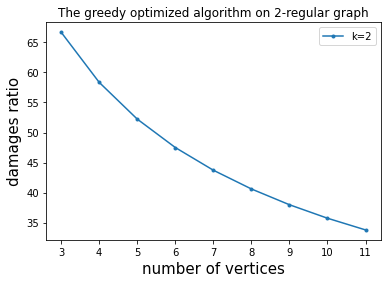

In [14]:
fig4, ax4 = plt.subplots()

ax4.plot(table4.columns, table4.loc[2], label="k=2", marker=".") # a graph 2-regular

ax4.set_xlabel("number of vertices", fontsize=15)
ax4.set_ylabel("damages ratio", fontsize=15)

ax4.legend() 

ax4.set_title('The greedy optimized algorithm on 2-regular graph', fontsize=12)
plt.show()

In [15]:
n= [len(g_k_regular.vs)]
print("The number of vertices: ",n) 

totalBurnt, protected, ratio = fire(g_k_regular,5, the_greedy_optimized) 
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

The number of vertices:  [11]
Total burnt vertices: {0, 5}, Protected vertices: {9, 6}, and Damage: 18.2%


## 2. Lattice graph

## grid graph

### Create a random growing graph called g_grid

In [16]:
# dim: list with the dimensions of the lattice
# nei: value giving the distance (number of steps) within which two vertices will be connected.
# directed: whether to create a directed graph.
# mutual: whether to create all connections as mutual in case of a directed graph.
# circular: whether the generated lattice is periodic.

g_grid = igraph.Graph.Lattice(dim=[4,3], nei=1, directed=False, mutual=False, circular=False)

### Visualization

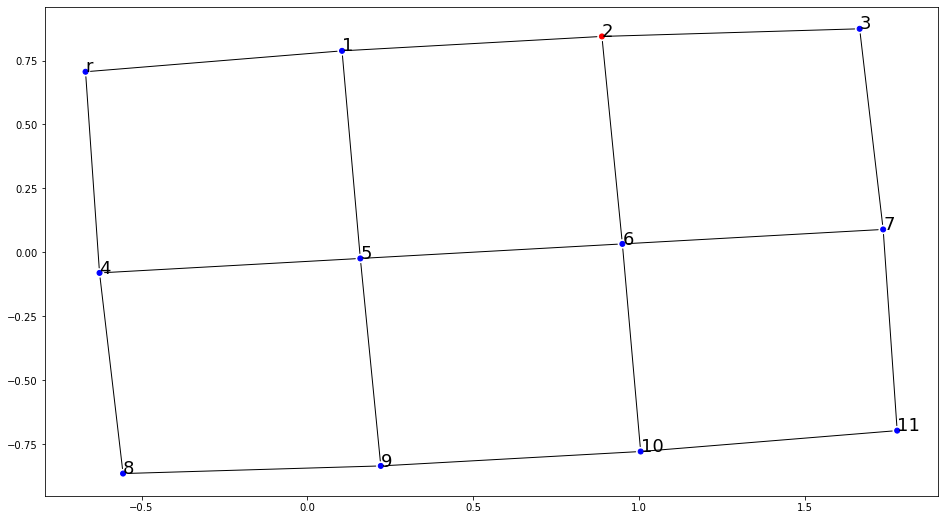

In [17]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(16, 9))
vNum=12 # the number of vertices
igraph.plot(g_grid, target=ax, vertex_color=["blue"]+["blue"]+["red"]+["blue"]*(vNum-3), 
            vertex_label_size=18, vertex_label_dist=20, vertex_label=['r']+list(range(1,vNum)))

### 1. Average highest damage with some iterations on graph g_grid

In [18]:
result = maxDamage(g_grid, the_greedy, 5) # g_random is a grid graph with dim 4*5=20 vertices
print(result)
print("")
print(f" The average max damage =  {sum(result[1])/len(result[1])}")

([[5, 6], [5, 6], [5, 6], [5, 6], [5, 6]], [58.3, 58.3, 58.3, 58.3, 58.3])

 The average max damage =  58.3


### 2. outcome on one chosen vertex on graph g_grid

In [19]:
n= [len(g_grid.vs)]
print("The number of vertices: ",n) 

totalBurnt, protected, ratio = fire(g_grid,2, the_greedy) # root is 2 in graph g_grid
print(f"Total burnt vertices: {totalBurnt}, Protected vertices: {protected}, and Damage: {ratio}%")

The number of vertices:  [12]
Total burnt vertices: {0, 1, 2, 3, 7, 11}, Protected vertices: {10, 4, 5, 6}, and Damage: 50.0%
